Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name.

In [0]:
NAME = "Balasubramaniam Theetharappan"

---

# Assignment Description
The purpose of this assignment is to gain some experience with multilayer and convolutional networks.
This assignment will be fairly open-ended, but I will give some general guidelines.

# Part 1 - Fully Connected Feed Forward Networks
Train a feedforward networks in python to perform a task of your choice. If you don't have anything in mind, you can do classification of some common datasets (MNIST, Fashion MNIST). You may find it interesting to use other datasets (faces, etc).

Please don't do anything simpler than this, unless it's interesting (a problem in your research, from your work, using a unique dataset).

You may use libraries for this assignment (tensorflow, keras, sklearn, etc). Please don't use other neural network libraries (pytorch, etc).

You may re-use code from previous assignment. You may follow some tutorial, but please some unique contribution (use a different dataset, for example).

# 1A - Preprocessing
Code that does any imports, data loading, preprocessing, normalization goes in the cell below. Please use only a single cell.

You may do this however you wish, but should follow the practices we learned in class (shuffling data, normalizing, etc).

If you want to experiment with some feature transformations, I would encourage it (just be careful of generating too many features).

In [2]:
# YOUR CODE HERE
# raise NotImplementedError()
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
#spliting into train and test set
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
sample = x_test.copy()
x_train = x_train/255.0
x_test = x_test/255.0
# x_train.shape,x_test.shape,y_test.shape,y_train.shape
# y_train[:10]

Using TensorFlow backend.


# 1B - Model definition
Create a fully connected feedforward network model. You can use whatever you want in terms of activation functions/architecture/etc.

However please make sure your architecture is compatible with the task you choose.

In [3]:
# YOUR CODE HERE
# NotImplementedError()
# plt.imshow(x_train[0],cmap=plt.cm.gray)
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dropout(0.28,input_shape=(28,)),
    Dense(32,activation = tf.nn.relu),
    Dense(10,activation = tf.nn.softmax)
])
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# 1C - Training
Train a single fully connected network for this task. If you do some kind of hyperparameter search, just include the best parameters in your submission.

In [4]:
# YOUR CODE HERE
# raise NotImplementedError()
history = model.fit(x_train,y_train,epochs=20, validation_data = (x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.6056 - acc: 0.7877 - val_loss: 0.4885 - val_acc: 0.8239
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.4755 - acc: 0.8302 - val_loss: 0.4497 - val_acc: 0.8384
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.4430 - acc: 0.8382 - val_loss: 0.4383 - val_acc: 0.8433
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.4231 - acc: 0.8462 - val_loss: 0.4195 - val_acc: 0.8462
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.4043 - acc: 0.8530 - val_loss: 0.3886 - val_acc: 0.8626
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3908 - acc: 0.8572 - val_loss: 0.3852 - val_acc: 0.8620
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss:

# 1D - Quantitative Evaluation
Do some quantitative evaluation of your trained model. At minimum you should report the accuracy on some withheld data. Plots would be preferable.

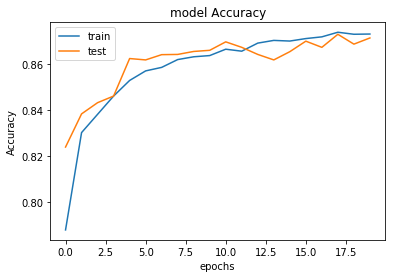

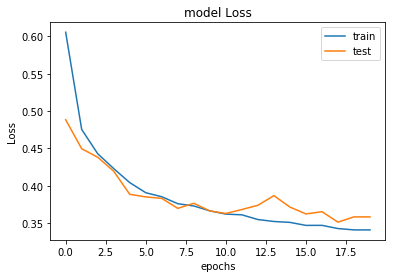

In [5]:
# YOUR CODE HERE
# raise NotImplementedError()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()

In [0]:
pred = model.predict(x_test)
pred_label = []
for i in pred:
  maxs = np.argmax(i)
  pred_label.append(maxs)
pred_label = np.array(pred_label)
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 1E - Qualitative Evaluation
Do some qualitative evaluation of your trained model. 

An example would be visualizing a small sample (10 or so) of images that were correctly classified from your validation data, and another sample of incorrectly classified samples.

Correctly predicted samples:


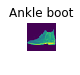

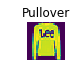

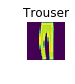

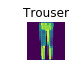

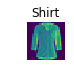

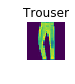

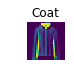

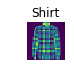

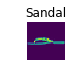

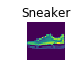

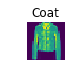

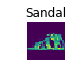

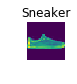

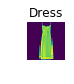

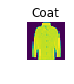

Wrongly predicted samples:


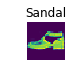

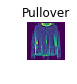

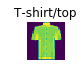

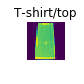

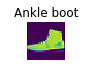

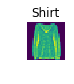

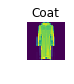

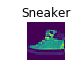

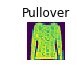

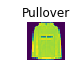

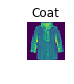

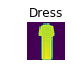

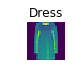

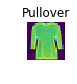

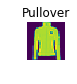

In [45]:
# YOUR CODE HERE
# raise NotImplementedError()
pred_correct = np.where(np.equal(pred_label,y_test))[0]
pred_wrong = np.where(np.not_equal(pred_label,y_test))[0]
num_rows = 5
num_cols = 3
num_img = num_rows*num_cols
print("Correctly predicted samples:")
plt.figure(figsize=(6,3))
for i in range(num_img):
  image = sample[pred_correct[i]]
  plt.subplot(num_rows,num_cols,i+1)
  plt.imshow(image)
  plt.title("{}".format(names[pred_label[pred_correct[i]]]))
  plt.axis('off')
  plt.show()
print("Wrongly predicted samples:")
for i in range(num_img):
  image = sample[pred_wrong[i]]
  plt.subplot(num_rows,num_cols,i+1)
  plt.imshow(image)
  plt.title("{}".format(names[pred_label[pred_wrong[i]]]))
  plt.axis('off')
  plt.show()


# 1F - Report
Write a few sentence summary of your work on part 1. It should answer the following questions:

1. What task were you trying to solve?
2. How did you implement it?
3. How did it perform? Did it do well? Overfit? Underfit?
4. Cite any resources/tutorials you used (informally, just a URL is ok). Citing papers isn't necessary.
5. This is meant to be a very simple summary (like the 'abstract' of a paper). No diagrams/etc necessary.

YOUR ANSWER HERE



1.  The task i am performing is the classifiction of images in the fashion mnist Datasets in keras Datasets. I have dataset of 60000 training images, of size 28*28 and 10000 test images of size 28*28.
2.  I implemented the model using the sequential model with two layers. First layer is a Dense layer with 32 nuerons and activation is Relu. Second layer is output layer with 10 nuerons for classification and with activation function of Softmax. The optimizer used is Adam and loss function used is Sprase Categorical Crossentropy.
3. Initially My model was Overfitting Then in order to avoid the overfitting problem i used Dropout. After adding Dropout my model was able to predict better with training accuracy of 87.3 and validation accuracy of 87.1
4. https://www.tensorflow.org/tutorials/keras/basic_classification







---------------------------------------------

# Part 2 - Advanced architectures (CNN/RNN)
In part 2 train an advanced architecture like a CNN to perform the same task from part 1. Please assume part 1 and 2 are run independently. So you may need to repeat code twice.

You do not need to do anything super fancy (don't try to train a 50 layer residual network, etc).

# 2A - Preprocessing
Code that does any imports, data loading, preprocessing, normalization goes in the cell below.

In [0]:
# YOUR CODE HERE
#raise NotImplementedError()
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
samples = x_test.copy()
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
x_train = x_train/255.0
x_test = x_test/255.0

# 2B - Model definition
Create a fully connected feedforward network model. You can use whatever you want in terms of activation functions/architecture/etc.

However please make sure your architecture is compatible with the task you choose.

In [0]:
# YOUR CODE HERE
# raise NotImplementedError()
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
# model.summary()
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# 2C - Training
Train a more advanced (CNN/RNN) for this task. If you do some kind of hyperparameter search, just include the best parameters in your submission.

In [10]:
# YOUR CODE HERE
# raise NotImplementedError()
history = model.fit(x_train,y_train,epochs=20,batch_size =15,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.4750 - acc: 0.8265 - val_loss: 0.3348 - val_acc: 0.8796
Epoch 2/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.3348 - acc: 0.8759 - val_loss: 0.2942 - val_acc: 0.8901
Epoch 3/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.3006 - acc: 0.8889 - val_loss: 0.2680 - val_acc: 0.9027
Epoch 4/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.2778 - acc: 0.8968 - val_loss: 0.2588 - val_acc: 0.9023
Epoch 5/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.2674 - acc: 0.9018 - val_loss: 0.2524 - val_acc: 0.9082
Epoch 6/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.2591 - acc: 0.9034 - val_loss: 0.2423 - val_acc: 0.9129
Epoch 7/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.2485 - acc: 0.9069 - val_loss: 0.

# 2D - Quantitative Evaluation
Re-do the quantiative evaluation from part 1 using this more advanced model.

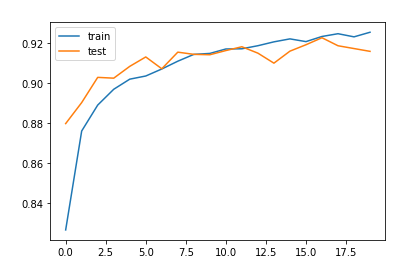

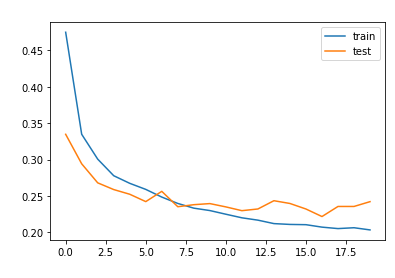

In [11]:
# YOUR CODE HERE
# raise NotImplementedError()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model Accuracy',color='white')
plt.ylabel('Accuracy',color='white')
plt.xlabel('epochs',color='white')
plt.legend(['train','test'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss',color='white')
plt.ylabel('Loss',color='white')
plt.xlabel('epochs',color='white')
plt.legend(['train','test'])
plt.show()

In [0]:
#preiction of test set and storing it in array for Qualitative Evaluation and creating the classnames array
pred = model.predict(x_test)
pred_label = []
for i in pred:
  maxs = np.argmax(i)
  pred_label.append(maxs)
pred_label = np.array(pred_label)
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2E - Qualitative Evaluation
Re-do the qualitative evaluation from part 1 using this more advanced model.

Correctly predicted samples:


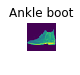

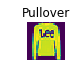

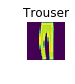

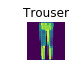

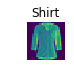

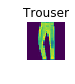

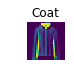

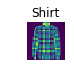

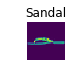

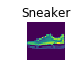

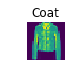

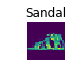

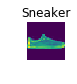

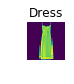

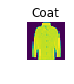

Wrongly predicted samples:


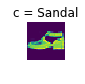

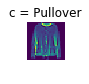

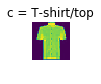

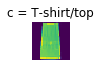

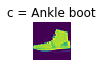

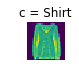

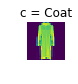

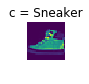

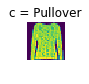

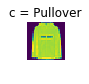

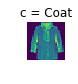

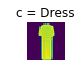

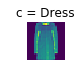

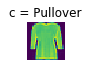

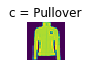

In [44]:
# YOUR CODE HERE
# raise NotImplementedError()
pred_correct = np.where(np.equal(pred_label,y_test))[0]
pred_wrong = np.where(np.not_equal(pred_label,y_test))[0]
num_rows = 5
num_cols = 3
num_img = num_rows*num_cols
print("Correctly predicted samples:")
plt.figure(figsize=(6,3))
for i in range(num_img):
  image = samples[pred_correct[i]]
  plt.subplot(num_rows,num_cols,i+1)
  plt.imshow(image)
  plt.title("{}".format(names[pred_label[pred_correct[i]]]))
  plt.axis('off')
  plt.show()
print("Wrongly predicted samples:")
for i in range(num_img):
  image = samples[pred_wrong[i]]
  plt.subplot(num_rows,num_cols,i+1)
  plt.imshow(image)
  plt.title("c = {}".format(names[pred_label[pred_wrong[i]]]))
  plt.axis('off')
  plt.show()

# 2F - Report
Write a few sentence summary of your work on part 2. Focus on the differences from part 1.

The summary should at least answer the following questions:
1. What task were you trying to solve?
2. How did you implement it.
3. How did it perform? Can you interpret the performance metrics in plain english? Did it do well? Overfit? Underfit?
4. Cite any resources/tutorials you used (informally, just a URL is ok). Citing papers isn't necessary.
5. This is meant to be a very simple summary (like the 'abstract' of a paper). No diagrams/etc necessary.

You can do some basic formatting with markdown if you'd like.


YOUR ANSWER HERE

1.  The task i am performing is the classifiction of images in the fashion mnist Datasets in keras Datasets. I have dataset of 60000 training images, of size 28*28 and 10000 test images of size 28*28.
2.  I created the CNN model with 3 layers: First layer has format of CONV => RELU => CONV  and second layer has format  of CONV => RELU => Conv and third layer has format of Dense => Dense => Softmax
3. My model can able to classify the images better compared to part 1 model with train accuracy of 92.6 and validation accuracy of 91.7 which better than the part 1 training and validation accuracy.
4. https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist

     https://keras.io/layers/convolutional/
